# A assiduidade dos deputados federais em 2017

Publicado em https://medium.com/quinhentos-e-noventa-e-quatro/a-assiduidade-dos-deputados-federais-em-2017-d0393debb6f2.

Datasets:
* [chamber_of_deputies_presences.csv](https://www.kaggle.com/iriomk/brazilian-federal-legislative-activity/downloads/chamber_of_deputies_presences.csv/2)
* [chamber_of_deputies_presences_congresspeople.csv](https://www.kaggle.com/iriomk/brazilian-federal-legislative-activity/downloads/chamber_of_deputies_presences_congresspeople.csv/2)

In [1]:
import numpy as np
import pandas as pd

converters = {
    'ending_time': pd.to_datetime,
    'session_number': np.str,
}
presences = pd.read_csv('data/chamber_of_deputies_presences.csv', converters=converters)
presences = presences \
    .query('term == 2015') \
    .query('legislative_session_number == 3') \
    .query('body == "chamber_of_deputies"')
print(presences.shape)
presences.head()

(217, 9)


,ending_time,first_president,congresspeople_present,term,body,legislative_schedule,legislative_session_number,schedule,session_number
0,2017-09-04 20:27:45,CARLOS MANATO,345,2015,chamber_of_deputies,ordinary_session,3,special_session,242
4,2017-09-26 20:34:57,DELEGADO EDSON MOREIRA,452,2015,chamber_of_deputies,ordinary_session,3,special_session,275
10,2017-08-16 18:00:25,CARLOS MANATO,464,2015,chamber_of_deputies,ordinary_session,3,special_session,217
11,2017-11-07 17:18:52,RODRIGO MAIA,427,2015,chamber_of_deputies,ordinary_session,3,special_session,334
14,2017-07-06 13:40:29,CARLOS MANATO,366,2015,chamber_of_deputies,ordinary_session,3,special_session,181


In [2]:
presences['congresspeople_present'].describe()

count    217.000000
mean     410.870968
std       64.941298
min       11.000000
25%      384.000000
50%      431.000000
75%      456.000000
max      506.000000
Name: congresspeople_present, dtype: float64

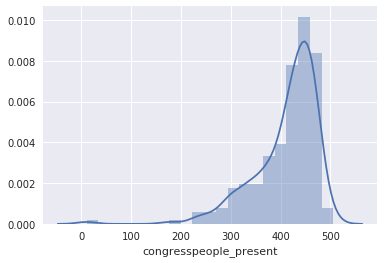

In [3]:
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

sns.distplot(presences['congresspeople_present']);

In [4]:
path = 'data/chamber_of_deputies_presences_congresspeople.csv'
dtype = {
    'congressperson_id': np.str,
    'session_number': np.str,
}
presences_congresspeople = pd.read_csv(path, dtype=dtype)
presences_congresspeople = presences_congresspeople \
    .query('term == 2015') \
    .query('legislative_session_number == 3') \
    .query('body == "chamber_of_deputies"')
presences_congresspeople = presences_congresspeople.drop_duplicates()
print(presences_congresspeople.shape)
presences_congresspeople.head()

(110603, 11)


/home/irio/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,name,status,party,state,congressperson_id,term,body,legislative_schedule,legislative_session_number,schedule,session_number
512,ABEL MESQUITA JR.,present,DEM,Roraima,1,2015,chamber_of_deputies,ordinary_session,3,special_session,170
513,CARLOS ANDRADE,present,PHS,Roraima,3,2015,chamber_of_deputies,ordinary_session,3,special_session,170
514,EDIO LOPES,present,PR,Roraima,2,2015,chamber_of_deputies,ordinary_session,3,special_session,170
515,HIRAN GONÇALVES,present,PP,Roraima,4,2015,chamber_of_deputies,ordinary_session,3,special_session,170
516,JHONATAN DE JESUS,present,PRB,Roraima,5,2015,chamber_of_deputies,ordinary_session,3,special_session,170


In [5]:
states = {
    'Acre': 'AC',
    'Alagoas': 'AL',
    'Amapá': 'AP',
    'Amazonas': 'AM',
    'Bahia': 'BA',
    'Ceará': 'CE',
    'dBahia': 'BA',
    'dCeará': 'CE',
    'dDistrito Federal': 'DF',
    'dEspírito Santo': 'ES',
    'dGoiás': 'GO',
    'Distrito Federal': 'DF',
    'dMinas Gerais': 'MG',
    'dPará': 'PA',
    'dParaíba': 'PB',
    'dParaná': 'PR',
    'dPernambuco': 'PE',
    'dRio de Janeiro': 'RJ',
    'dSão Paulo': 'SP',
    'dSergipe': 'SE',
    'Espírito Santo': 'ES',
    'Goiás': 'GO',
    'Maranhão': 'MA',
    'Mato Grosso do Sul': 'MS',
    'Mato Grosso': 'MT',
    'Minas Gerais': 'MG',
    'Pará': 'PA',
    'Paraíba': 'PB',
    'Paraná': 'PR',
    'Pernambuco': 'PE',
    'Piauí': 'PI',
    'Rio de Janeiro': 'RJ',
    'Rio Grande do Norte': 'RN',
    'Rio Grande do Sul': 'RS',
    'Rio Grande': 'RS',
    'Rondônia': 'RO',
    'Rondonia': 'RO',
    'Roraima': 'RR',
    'Santa Catarina': 'SC',
    'São Paulo': 'SP',
    'Sergipe': 'SE',
    'Tocantins': 'TO',
}
presences_congresspeople.replace({'state': states}, inplace=True)

In [6]:
presences_congresspeople['name'].replace({
    'CHICO D´ANGELO': 'CHICO D\'ANGELO',
    'CHICO D ANGELO': 'CHICO D\'ANGELO',
    'JOZI  ARAÚJO': 'JOZI ARAÚJO',
    'JULIÃO AMIN CASTRO': 'JULIÃO AMIN',
    'PROFESSORA DORINHA SEABRA REZEN': 'PROFESSORA DORINHA SEABRA REZENDE',
}, inplace=True)

Pessoas listadas no site da Câmara que não têm nenhuma presença em sessões.

In [7]:
# from http://www2.camara.leg.br/deputados/pesquisa
congresspeople = set(['ABEL MESQUITA JR.', 'ADAIL CARNEIRO', 'ADALBERTO CAVALCANTI', 'ADELMO CARNEIRO LEÃO', 'ADELSON BARRETO', 'ADEMIR CAMILO', 'AELTON FREITAS', 'AFONSO FLORENCE', 'AFONSO HAMM', 'AFONSO MOTTA', 'AGUINALDO RIBEIRO', 'ALAN RICK', 'ALBERTO FILHO', 'ALBERTO FRAGA', 'ALCEU MOREIRA', 'ALESSANDRO MOLON', 'ALEX CANZIANI', 'ALEX MANENTE', 'ALEXANDRE LEITE', 'ALEXANDRE SERFIOTIS', 'ALEXANDRE VALLE', 'ALFREDO KAEFER', 'ALFREDO NASCIMENTO', 'ALICE PORTUGAL', 'ALIEL MACHADO', 'ALTINEU CÔRTES', 'ALUISIO MENDES', 'ANA PERUGINI', 'ANDRÉ ABDON', 'ANDRÉ AMARAL', 'ANDRÉ DE PAULA', 'ANDRÉ FIGUEIREDO', 'ANDRÉ FUFUCA', 'ANDRE MOURA', 'ANDRES SANCHEZ', 'ANGELIM', 'ANÍBAL GOMES', 'ANTONIO BRITO', 'ANTONIO BULHÕES', 'ANTONIO CARLOS MENDES THAME', 'ANTONIO IMBASSAHY', 'ANTÔNIO JÁCOME', 'ARIOSTO HOLANDA', 'ARLINDO CHINAGLIA', 'ARNALDO FARIA DE SÁ', 'ARNALDO JORDY', 'AROLDE DE OLIVEIRA', 'ARTHUR LIRA', 'ARTHUR OLIVEIRA MAIA', 'ASSIS CARVALHO', 'ASSIS DO COUTO', 'ASSIS MELO', 'ÁTILA LINS', 'ÁTILA LIRA', 'AUGUSTO CARVALHO', 'AUGUSTO COUTINHO', 'AUREO', 'BACELAR', 'BALEIA ROSSI', 'BEBETO', 'BENEDITA DA SILVA', 'BENITO GAMA', 'BENJAMIN MARANHÃO', 'BETINHO GOMES', 'BETO FARO', 'BETO MANSUR', 'BETO ROSADO', 'BETO SALAME', 'BILAC PINTO', 'BOHN GASS', 'BONIFÁCIO DE ANDRADA', 'BRUNA FURLAN', 'BRUNNY', 'BRUNO ARAÚJO', 'CABO DACIOLO', 'CABO SABINO', 'CABUÇU BORGES', 'CACÁ LEÃO', 'CAETANO', 'CAIO NARCIO', 'CAJAR NARDES', 'CAPITÃO AUGUSTO', 'CARLOS ANDRADE', 'CARLOS BEZERRA', 'CARLOS EDUARDO CADOCA', 'CARLOS GOMES', 'CARLOS HENRIQUE GAGUIM', 'CARLOS MANATO', 'CARLOS MELLES', 'CARLOS SAMPAIO', 'CARLOS SOUZA', 'CARLOS ZARATTINI', 'CARMEN ZANOTTO', 'CÉLIO SILVEIRA', 'CELSO JACOB', 'CELSO MALDANER', 'CELSO PANSERA', 'CELSO RUSSOMANNO', 'CÉSAR HALUM', 'CÉSAR MESSIAS', 'CESAR SOUZA', 'CHICO ALENCAR', 'CHICO D\'ANGELO', 'CHICO LOPES', 'CHRISTIANE DE SOUZA YARED', 'CÍCERO ALMEIDA', 'CLAUDIO CAJADO', 'CLEBER VERDE', 'CONCEIÇÃO SAMPAIO', 'COVATTI FILHO', 'CREUZA PEREIRA', 'CRISTIANE BRASIL', 'DAGOBERTO NOGUEIRA', 'DAMIÃO FELICIANO', 'DÂMINA PEREIRA', 'DANIEL ALMEIDA', 'DANIEL COELHO', 'DANIEL VILELA', 'DANILO CABRAL', 'DANILO FORTE', 'DANRLEI DE DEUS HINTERHOLZ', 'DARCÍSIO PERONDI', 'DAVIDSON MAGALHÃES', 'DÉCIO LIMA', 'DEJORGE PATRÍCIO', 'DELEGADO ÉDER MAURO', 'DELEGADO EDSON MOREIRA', 'DELEGADO FRANCISCHINI', 'DELEGADO WALDIR', 'DELEY', 'DEOCLIDES MACEDO', 'DIEGO ANDRADE', 'DIEGO GARCIA', 'DILCEU SPERAFICO', 'DIMAS FABIANO', 'DOMINGOS NETO', 'DOMINGOS SÁVIO', 'DR. JORGE SILVA', 'DR. SINVAL MALHEIROS', 'DULCE MIRANDA', 'EDIO LOPES', 'EDMAR ARRUDA', 'EDMILSON RODRIGUES', 'EDUARDO BARBOSA', 'EDUARDO BOLSONARO', 'EDUARDO CURY', 'EDUARDO DA FONTE', 'EFRAIM FILHO', 'ELCIONE BARBALHO', 'ELI CORRÊA FILHO', 'ELIZEU DIONIZIO', 'ELIZIANE GAMA', 'ELMAR NASCIMENTO', 'ENIO VERRI', 'ERIKA KOKAY', 'ERIVELTON SANTANA', 'EROS BIONDINI', 'ESPERIDIÃO AMIN', 'EVAIR VIEIRA DE MELO', 'EVANDRO GUSSI', 'EVANDRO ROMAN', 'EXPEDITO NETTO', 'EZEQUIEL FONSECA', 'EZEQUIEL TEIXEIRA', 'FÁBIO FARIA', 'FABIO GARCIA', 'FÁBIO MITIDIERI', 'FÁBIO RAMALHO', 'FABIO REIS', 'FÁBIO SOUSA', 'FÁBIO TRAD', 'FAUSTO PINATO', 'FELIPE BORNIER', 'FELIPE MAIA', 'FÉLIX MENDONÇA JÚNIOR', 'FERNANDO MONTEIRO', 'FERNANDO TORRES', 'FLÁVIA MORAIS', 'FLAVIANO MELO', 'FLAVINHO', 'FRANCISCO CHAPADINHA', 'FRANCISCO FLORIANO', 'FRANKLIN', 'GABRIEL GUIMARÃES', 'GENECIAS NORONHA', 'GEORGE HILTON', 'GEOVANIA DE SÁ', 'GERALDO RESENDE', 'GIACOBO', 'GILBERTO NASCIMENTO', 'GIOVANI CHERINI', 'GIUSEPPE VECCI', 'GIVALDO CARIMBÃO', 'GIVALDO VIEIRA', 'GLAUBER BRAGA', 'GONZAGA PATRIOTA', 'GORETE PEREIRA', 'GOULART', 'GUILHERME MUSSI', 'HEITOR SCHUCH', 'HELDER SALOMÃO', 'HÉLIO LEITE', 'HENRIQUE FONTANA', 'HERÁCLITO FORTES', 'HERCULANO PASSOS', 'HERMES PARCIANELLO', 'HEULER CRUVINEL', 'HILDO ROCHA', 'HIRAN GONÇALVES', 'HISSA ABRAHÃO', 'HUGO LEAL', 'HUGO MOTTA', 'IRACEMA PORTELLA', 'IRAJÁ ABREU', 'IRMÃO LAZARO', 'IVAN VALENTE', 'IZALCI LUCAS', 'IZAQUE SILVA', 'JAIME MARTINS', 'JAIR BOLSONARO', 'JANDIRA FEGHALI', 'JANETE CAPIBERIBE', 'JARBAS VASCONCELOS', 'JEAN WYLLYS', 'JEFFERSON CAMPOS', 'JERÔNIMO GOERGEN', 'JÉSSICA SALES', 'JHC', 'JHONATAN DE JESUS', 'JÔ MORAES', 'JOÃO ARRUDA', 'JOÃO CAMPOS', 'JOÃO CARLOS BACELAR', 'JOÃO DANIEL', 'JOÃO DERLY', 'JOÃO FERNANDO COUTINHO', 'JOÃO GUALBERTO', 'JOÃO MARCELO SOUZA', 'JOÃO PAULO KLEINÜBING', 'JOÃO PAULO PAPA', 'JOÃO RODRIGUES', 'JOAQUIM PASSARINHO', 'JONES MARTINS', 'JONY MARCOS', 'JORGE BOEIRA', 'JORGE CÔRTE REAL', 'JORGE SOLLA', 'JORGE TADEU MUDALEN', 'JORGINHO MELLO', 'JOSÉ AIRTON CIRILO', 'JOSÉ CARLOS ALELUIA', 'JOSÉ CARLOS ARAÚJO', 'JOSÉ FOGAÇA', 'JOSÉ GUIMARÃES', 'JOSÉ MENTOR', 'JOSÉ NUNES', 'JOSÉ OTÁVIO GERMANO', 'JOSÉ PRIANTE', 'JOSÉ REINALDO', 'JOSÉ ROCHA', 'JOSE STÉDILE', 'JOSI NUNES', 'JOSUÉ BENGTSON', 'JOVAIR ARANTES', 'JOZI ARAÚJO', 'JÚLIA MARINHO', 'JÚLIO CESAR', 'JÚLIO DELGADO', 'JULIO LOPES', 'JUNIOR MARRECA', 'JUSCELINO FILHO', 'JUTAHY JUNIOR', 'KEIKO OTA', 'LAERCIO OLIVEIRA', 'LAERTE BESSA', 'LAUDIVIO CARVALHO', 'LAURA CARNEIRO', 'LÁZARO BOTELHO', 'LEANDRE', 'LELO COIMBRA', 'LEO DE BRITO', 'LEONARDO MONTEIRO', 'LEONARDO QUINTÃO', 'LEÔNIDAS CRISTINO', 'LEOPOLDO MEYER', 'LINCOLN PORTELA', 'LINDOMAR GARÇON', 'LOBBE NETO', 'LUANA COSTA', 'LUCAS VERGILIO', 'LUCIANA SANTOS', 'LUCIANO BIVAR', 'LUCIANO DUCCI', 'LUCIO MOSQUINI', 'LÚCIO VALE', 'LUCIO VIEIRA LIMA', 'LUIS CARLOS HEINZE', 'LUIS TIBÉ', 'LUIZ CARLOS HAULY', 'LUIZ CARLOS RAMOS', 'LUIZ CLÁUDIO', 'LUIZ COUTO', 'LUIZ FERNANDO FARIA', 'LUIZ LAURO FILHO', 'LUIZ NISHIMORI', 'LUIZ SÉRGIO', 'LUIZA ERUNDINA', 'LUIZIANNE LINS', 'MACEDO', 'MAGDA MOFATTO', 'MAIA FILHO', 'MAJOR OLIMPIO', 'MANDETTA', 'MARA GABRILLI', 'MARCELO AGUIAR', 'MARCELO ÁLVARO ANTÔNIO', 'MARCELO ARO', 'MARCELO CASTRO', 'MARCELO DELAROLI', 'MARCELO MATOS', 'MARCELO SQUASSONI', 'MARCIO ALVINO', 'MÁRCIO MARINHO', 'MARCO ANTÔNIO CABRAL', 'MARCO MAIA', 'MARCO TEBALDI', 'MARCON', 'MARCOS ABRÃO', 'MARCOS MONTES', 'MARCOS REATEGUI', 'MARCOS ROGÉRIO', 'MARCOS SOARES', 'MARCUS PESTANA', 'MARCUS VICENTE', 'MARGARIDA SALOMÃO', 'MARIA DO ROSÁRIO', 'MARIA HELENA', 'MARIANA CARVALHO', 'MARINALDO ROSENDO', 'MARINHA RAUPP', 'MÁRIO HERINGER', 'MÁRIO NEGROMONTE JR.', 'MAURO LOPES', 'MAURO MARIANI', 'MAURO PEREIRA', 'MIGUEL HADDAD', 'MIGUEL LOMBARDI', 'MILTON MONTI', 'MIRO TEIXEIRA', 'MISAEL VARELLA', 'MISSIONÁRIO JOSÉ OLIMPIO', 'MOISÉS DINIZ', 'MOSES RODRIGUES', 'NELSON MARQUEZELLI', 'NELSON MEURER', 'NELSON PADOVANI', 'NELSON PELLEGRINO', 'NEWTON CARDOSO JR', 'NILSON LEITÃO', 'NILSON PINTO', 'NILTO TATTO', 'NILTON CAPIXABA', 'NIVALDO ALBUQUERQUE', 'NORMA AYUB', 'ODORICO MONTEIRO', 'ONYX LORENZONI', 'ORLANDO SILVA', 'OSMAR BERTOLDI', 'OSMAR SERRAGLIO', 'OTAVIO LEITE', 'PADRE JOÃO', 'PAES LANDIM', 'PASTOR EURICO', 'PASTOR LUCIANO BRAGA', 'PATRUS ANANIAS', 'PAUDERNEY AVELINO', 'PAULÃO', 'PAULO ABI-ACKEL', 'PAULO AZI', 'PAULO FEIJÓ', 'PAULO FOLETTO', 'PAULO FREIRE', 'PAULO MAGALHÃES', 'PAULO MALUF', 'PAULO PEREIRA DA SILVA', 'PAULO PIMENTA', 'PAULO TEIXEIRA', 'PEDRO CHAVES', 'PEDRO CUNHA LIMA', 'PEDRO FERNANDES', 'PEDRO PAULO', 'PEDRO UCZAI', 'PEDRO VILELA', 'PEPE VARGAS', 'POLLYANA GAMA', 'POMPEO DE MATTOS', 'PR. MARCO FELICIANO', 'PROFESSOR VICTÓRIO GALLI', 'PROFESSORA DORINHA SEABRA REZENDE', 'PROFESSORA MARCIVANIA', 'RAFAEL MOTTA', 'RAIMUNDO GOMES DE MATOS', 'RAQUEL MUNIZ', 'REGINALDO LOPES', 'REINHOLD STEPHANES', 'REMÍDIO MONAI', 'RENATA ABREU', 'RENATO ANDRADE', 'RENATO MOLLING', 'RENZO BRAZ', 'RICARDO IZAR', 'RICARDO TEOBALDO', 'RICARDO TRIPOLI', 'ROBERTO ALVES', 'ROBERTO BALESTRA', 'ROBERTO BRITTO', 'ROBERTO DE LUCENA', 'ROBERTO FREIRE', 'ROBERTO GÓES', 'ROBERTO SALES', 'ROCHA', 'RODRIGO DE CASTRO', 'RODRIGO MAIA', 'RODRIGO MARTINS', 'RODRIGO PACHECO', 'ROGÉRIO MARINHO', 'ROGÉRIO PENINHA MENDONÇA', 'ROGÉRIO ROSSO', 'RÔMULO GOUVEIA', 'RONALDO BENEDET', 'RONALDO CARLETTO', 'RONALDO FONSECA', 'RONALDO LESSA', 'RONALDO MARTINS', 'RÔNEY NEMER', 'ROSANGELA GOMES', 'ROSINHA DA ADEFAL', 'RUBENS BUENO', 'RUBENS OTONI', 'RUBENS PEREIRA JÚNIOR', 'SÁGUAS MORAES', 'SANDES JÚNIOR', 'SANDRO ALEX', 'SARAIVA FELIPE', 'SÉRGIO BRITO', 'SÉRGIO MORAES', 'SÉRGIO REIS', 'SERGIO SOUZA', 'SERGIO VIDIGAL', 'SERGIO ZVEITER', 'SEVERINO NINHO', 'SHÉRIDAN', 'SILAS CÂMARA', 'SILAS FREIRE', 'SILVIO COSTA', 'SILVIO TORRES', 'SIMÃO SESSIM', 'SIMONE MORGADO', 'SORAYA SANTOS', 'SÓSTENES CAVALCANTE', 'STEFANO AGUIAR', 'SUBTENENTE GONZAGA', 'TADEU ALENCAR', 'TAKAYAMA', 'TENENTE LÚCIO', 'TEREZA CRISTINA', 'THIAGO PEIXOTO', 'TIRIRICA', 'TONINHO PINHEIRO', 'TONINHO WANDSCHEER', 'ULDURICO JUNIOR', 'VAIDON OLIVEIRA', 'VALADARES FILHO', 'VALDIR COLATTO', 'VALMIR ASSUNÇÃO', 'VALMIR PRASCIDELLI', 'VALTENIR PEREIRA', 'VANDER LOUBET', 'VANDERLEI MACRIS', 'VENEZIANO VITAL DO RÊGO', 'VICENTE ARRUDA', 'VICENTE CANDIDO', 'VICENTINHO', 'VICENTINHO JÚNIOR', 'VICTOR MENDES', 'VINICIUS CARVALHO', 'VINICIUS GURGEL', 'VITOR LIPPI', 'VITOR VALIM', 'WADIH DAMOUS', 'WALDENOR PEREIRA', 'WALDIR MARANHÃO', 'WALNEY ROCHA', 'WALTER ALVES', 'WALTER IHOSHI', 'WELITON PRADO', 'WELLINGTON ROBERTO', 'WEVERTON ROCHA', 'WILSON BESERRA', 'WILSON FILHO', 'WLADIMIR COSTA', 'WOLNEY QUEIROZ', 'XUXU DAL MOLIN', 'YEDA CRUSIUS', 'ZÉ AUGUSTO NALIN', 'ZÉ CARLOS', 'ZÉ GERALDO', 'ZÉ SILVA', 'ZECA CAVALCANTI', 'ZECA DIRCEU', 'ZECA DO PT', 'ZENAIDE MAIA'])
congresspeople - set(presences_congresspeople['name'].unique())

{'FÁBIO TRAD'}

Pessoas que têm presença mas não mais listadas no site da Câmara como deputados ativos.

In [8]:
inactive_congresspeople = set(presences_congresspeople['name'].unique()) - congresspeople
print(len(inactive_congresspeople))
inactive_congresspeople

40


{'ADILTON SACHETTI',
 'ADÉRMIS MARINI',
 'ALEXANDRE BALDY',
 'ARNALDO JARDIM',
 'ARTHUR VIRGÍLIO BISNETO',
 'CAPITÃO FÁBIO ABREU',
 'CARLOS MARUN',
 'DAGOBERTO',
 'EDINHO BEZ',
 'FELIPE CARRERAS',
 'FERNANDO COELHO FILHO',
 'FLORIANO PESARO',
 'FRANKLIN LIMA',
 'GUILHERME COELHO',
 'JOSIAS GOMES',
 'JULIÃO AMIN',
 'KAIO MANIÇOBA',
 'LEONARDO PICCIANI',
 'LOURIVAL GOMES',
 'LUZIA FERREIRA',
 'MARCOS MEDRADO',
 'MARX BELTRÃO',
 'MAURÍCIO QUINTELLA LESSA',
 'MENDONÇA FILHO',
 'MÁRIO NEGROMONTE JR',
 'OSMAR TERRA',
 'PAULO HENRIQUE LUSTOSA',
 'PR. LUCIANO BRAGA',
 'RAUL JUNGMANN',
 'REJANE DIAS',
 'ROBINSON ALMEIDA',
 'ROCHA LOURES',
 'RODRIGO GARCIA',
 'ROGÉRIO SILVA',
 'RONALDO NOGUEIRA',
 'SABINO CASTELO BRANCO',
 'SAMUEL MOREIRA',
 'SARNEY FILHO',
 'SEBASTIÃO OLIVEIRA',
 'TIA ERON'}

In [9]:
# def agg(data):
#     return pd.Series({
#         'avg_presences': data['congresspeople_present'].mean(),
#         'month': data['ending_time'].iloc[0].month,
#         'day': data['ending_time'].iloc[0].day,
#     })


# per_day = presences.groupby(dates).apply(agg).reset_index().head()

In [10]:
import datetime

dates = presences['ending_time'].apply(lambda val: val.date())
per_day = presences \
    .groupby(dates)['congresspeople_present'] \
    .mean() \
    .reset_index() \
    .rename(columns={'ending_time': 'date'})
per_day['date'] = pd.to_datetime(per_day['date'])
dates = pd.date_range(datetime.date(2017, 1, 1),
                      datetime.date(2017, 12, 31))
per_day = pd.DataFrame({'date': dates}) \
    .merge(per_day, how='left') \
    .replace({np.nan: 0})
per_day['day'] = per_day['date'].dt.day
per_day['dayofweek'] = per_day['date'].dt.dayofweek
per_day['month'] = per_day['date'].dt.month
per_day.sample(6, random_state=0)

,date,congresspeople_present,day,dayofweek,month
106,2017-04-17,0.0,17,0,4
259,2017-09-17,0.0,17,6,9
45,2017-02-15,440.5,15,2,2
26,2017-01-27,0.0,27,4,1
78,2017-03-20,0.0,20,0,3
346,2017-12-13,438.5,13,2,12


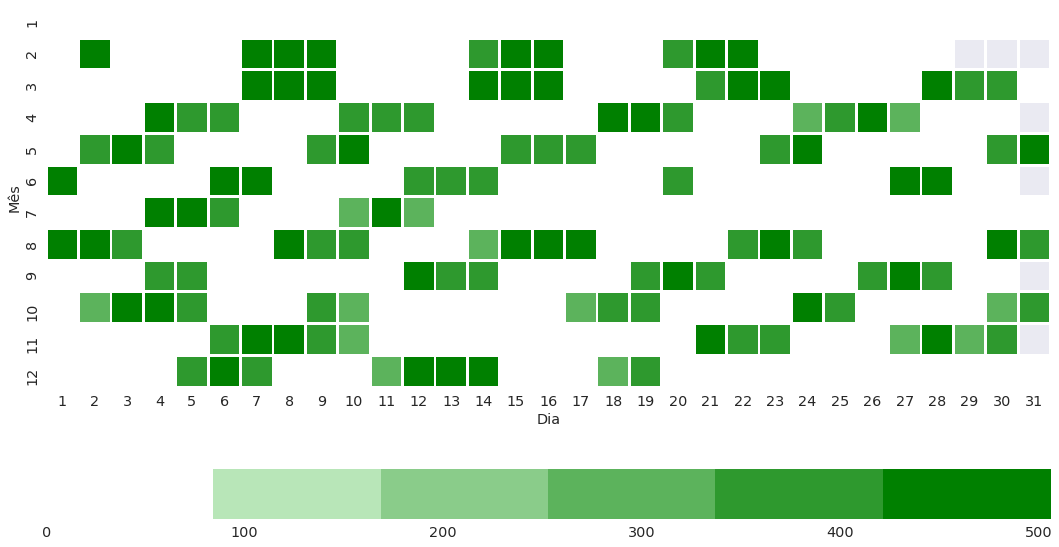

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

data = per_day.rename(columns={
    'day': 'Dia',
    'dayofweek': 'Dia da semana',
    'month': 'Mês',
    'congresspeople_present': 'Deputados presentes',
})
data = data.pivot('Mês', 'Dia', 'Deputados presentes')

color_palette = sns.light_palette('green')
color_palette[0] = np.array([1, 1, 1])
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(data,
            cbar_kws={'orientation': 'horizontal'},
            cmap=color_palette,
            linewidths=2)

Com um mês de férias (15 de janeiro - 15 de dezembro), 2017 tem 239 dias úteis. A Câmara teve sessões em 122 dias. Mudando um pouco a agenda e fazendo com que as sessões aconteçam 5 dias por semana permitiria que os parlamentares começassem o ano dia 28 de junho.

fonte:

https://www.wolframalpha.com/input/?i=business+days+from+january+15+until+december+15

https://www.wolframalpha.com/input/?i=122+business+days+before+december+15

In [12]:
per_day.query('congresspeople_present > 0').shape[0]

122

Monday=0, Sunday=6

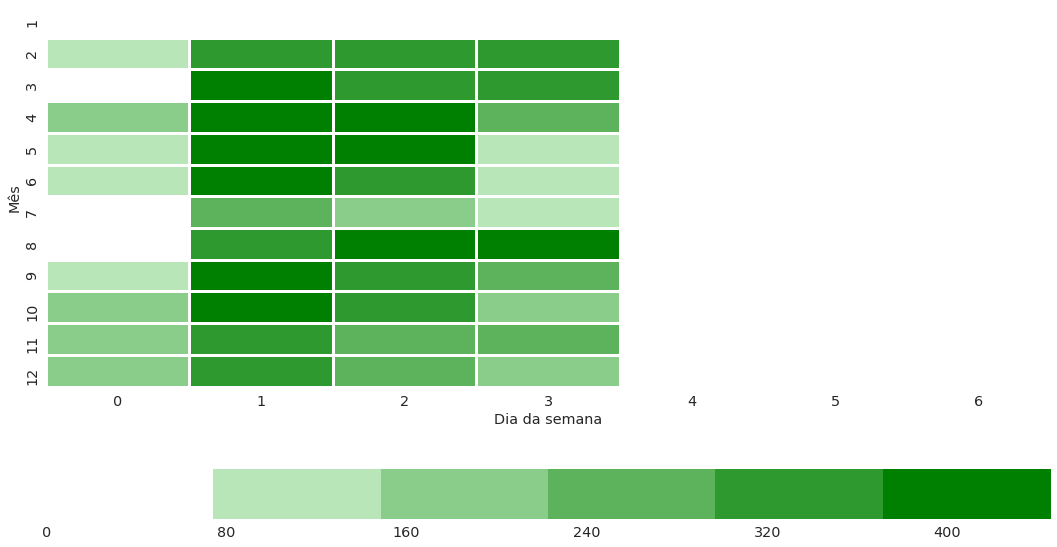

In [13]:
data = per_day.rename(columns={
    'day': 'Dia',
    'dayofweek': 'Dia da semana',
    'month': 'Mês',
    'congresspeople_present': 'Deputados presentes',
})
data = data.groupby(['Mês', 'Dia da semana'])['Deputados presentes'].mean().reset_index()
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(data.pivot('Mês', 'Dia da semana', 'Deputados presentes'),
            cbar_kws={'orientation': 'horizontal'},
            cmap=color_palette,
            linewidths=2)

---

In [14]:
presences_congresspeople['status'].value_counts()

present    89153
absent     21449
Name: status, dtype: int64

In [15]:
presences_congresspeople.head()

,name,status,party,state,congressperson_id,term,body,legislative_schedule,legislative_session_number,schedule,session_number
512,ABEL MESQUITA JR.,present,DEM,RR,1,2015,chamber_of_deputies,ordinary_session,3,special_session,170
513,CARLOS ANDRADE,present,PHS,RR,3,2015,chamber_of_deputies,ordinary_session,3,special_session,170
514,EDIO LOPES,present,PR,RR,2,2015,chamber_of_deputies,ordinary_session,3,special_session,170
515,HIRAN GONÇALVES,present,PP,RR,4,2015,chamber_of_deputies,ordinary_session,3,special_session,170
516,JHONATAN DE JESUS,present,PRB,RR,5,2015,chamber_of_deputies,ordinary_session,3,special_session,170


In [16]:
presences['session_number'].unique().shape[0]

217

In [17]:
from IPython.display import display

n_sessions = presences['session_number'].unique().shape[0]

def agg(data):
    sessions_count = data.shape[0]
    present_count = data.query('status == "present"').shape[0]
    absent = data.query('status == "absent"')
    absent_count = absent.shape[0]
    score = present_count / sessions_count * (sessions_count / n_sessions)**(1/3)
    unique_dates = absent['ending_time'].dt.date.unique().shape[0]
    return pd.Series({
        'state': data.iloc[0]['state'],
        'days_missed': unique_dates,
        'present': present_count,
        'present_proportion': present_count / sessions_count,
        'absent': absent_count,
        'sessions': sessions_count,
        'score': score,
    })

presences_congresspeople_complete = presences_congresspeople \
    .merge(presences, on='session_number', how='left', suffixes=('', '_session'))
congresspeople = presences_congresspeople_complete \
    .groupby(['name']) \
    .apply(agg) \
    .sort_values('score', ascending=False)
display(congresspeople.head(20))
display(congresspeople.tail(20))

,absent,days_missed,present,present_proportion,score,sessions,state
name,,,,,,,
CARLOS MANATO,0,0,217,1.000000,1.000000,217,ES
MARCIO ALVINO,1,1,216,0.995392,0.995392,217,SP
TENENTE LÚCIO,1,1,216,0.995392,0.995392,217,MG
WELITON PRADO,2,2,215,0.990783,0.990783,217,MG
VICTOR MENDES,2,2,215,0.990783,0.990783,217,MA
LINCOLN PORTELA,3,3,214,0.986175,0.986175,217,MG
CONCEIÇÃO SAMPAIO,3,3,214,0.986175,0.986175,217,AM
TIRIRICA,3,3,214,0.986175,0.986175,217,SP
PEDRO FERNANDES,4,4,213,0.981567,0.981567,217,MA


,absent,days_missed,present,present_proportion,score,sessions,state
name,,,,,,,
ANTONIO IMBASSAHY,1,1,9,0.900000,0.322668,10,BA
FELIPE CARRERAS,0,0,7,1.000000,0.318331,7,PE
JOSÉ OTÁVIO GERMANO,150,94,64,0.299065,0.297681,214,RS
FERNANDO COELHO FILHO,5,4,11,0.687500,0.288288,16,PE
MENDONÇA FILHO,3,2,9,0.750000,0.285738,12,PE
SEBASTIÃO OLIVEIRA,0,0,5,1.000000,0.284558,5,PE
LEONARDO PICCIANI,0,0,5,1.000000,0.284558,5,RJ
SARNEY FILHO,1,1,5,0.833333,0.251990,6,MA
MARX BELTRÃO,1,1,5,0.833333,0.251990,6,AL


In [18]:
congresspeople['present_proportion'].describe()

count    551.000000
mean       0.798006
std        0.145141
min        0.000000
25%        0.744186
50%        0.820276
75%        0.898383
max        1.000000
Name: present_proportion, dtype: float64

In [19]:
congresspeople[congresspeople['present_proportion'] < .75].shape, 146/551

((146, 7), 0.26497277676951)

In [20]:
congresspeople['days_missed'].describe()

count    551.000000
mean      29.958258
std       18.313534
min        0.000000
25%       17.000000
50%       28.000000
75%       40.000000
max       94.000000
Name: days_missed, dtype: float64

In [21]:
congresspeople.query('absent > 5').shape

(509, 7)

In [22]:
keys = ['name', 'status', 'ending_time', 'session_number']
presence_statuses = presences_congresspeople_complete[keys]
presence_statuses.head()

,name,status,ending_time,session_number
0,ABEL MESQUITA JR.,present,2017-06-27 00:06:03,170
1,CARLOS ANDRADE,present,2017-06-27 00:06:03,170
2,EDIO LOPES,present,2017-06-27 00:06:03,170
3,HIRAN GONÇALVES,present,2017-06-27 00:06:03,170
4,JHONATAN DE JESUS,present,2017-06-27 00:06:03,170


In [23]:
sessions = presence_statuses \
    .drop_duplicates('session_number') \
    [['session_number', 'ending_time']]
out_of_congress = presence_statuses[['name']]
out_of_congress['key'] = 42
sessions['key'] = 42
out_of_congress = sessions \
    .merge(out_of_congress, on='key') \
    .drop_duplicates(['session_number', 'name'])
presence_statuses = pd.concat([presence_statuses, out_of_congress]) \
    .drop_duplicates(['session_number', 'name']) \
    .sort_values('ending_time', ascending=True) \
    .drop('key', axis=1)

/home/irio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
def largest_absence(data):
    windows = []
    status, window_start = 'absent', datetime.date(2017, 2, 2)
    for _, row in data.iterrows():
        if status != row['status']:
            window = status, abs(row['ending_time'].date() - window_start)
            windows.append(window)
            status = row['status']
            window_start = row['ending_time'].date()
    windows = [x for x in windows if x[0] == 'absent']
    if windows:
        return max(windows, key=lambda x: x[1])[1].days
    else:
        return 0

def agg(data):
    return pd.Series({
        'largest_absence': largest_absence(data),
    })

data = presence_statuses \
    .groupby(['name']) \
    .apply(agg)
congresspeople = congresspeople.reset_index().merge(data.reset_index(), on='name')

In [25]:
largest_absences = congresspeople \
    .query('largest_absence > 30') \
    .sort_values('largest_absence', ascending=False)
print(largest_absences.shape)
largest_absences

(19, 9)


,name,absent,days_missed,present,present_proportion,score,sessions,state,largest_absence
533,JOSÉ OTÁVIO GERMANO,150,94,64,0.299065,0.297681,214,RS,124
524,GIOVANI CHERINI,133,81,83,0.384259,0.383668,216,RS,124
487,ARIOSTO HOLANDA,91,53,125,0.578704,0.577813,216,CE,111
468,DANRLEI DE DEUS HINTERHOLZ,78,57,136,0.635514,0.632572,214,RS,63
521,ROBERTO GÓES,130,78,85,0.395349,0.394130,215,AP,56
434,LUCIO VIEIRA LIMA,68,46,148,0.685185,0.684131,216,BA,50
516,ADAIL CARNEIRO,119,71,94,0.441315,0.438586,213,CE,45
505,SÉRGIO BRITO,101,70,114,0.530233,0.528599,215,BA,41
530,ARTHUR VIRGÍLIO BISNETO,82,51,52,0.388060,0.330456,134,AM,41
323,MARCOS ABRÃO,46,34,170,0.787037,0.785826,216,GO,40


In [26]:
largest_absences = congresspeople \
    .query('largest_absence > 15') \
    .sort_values('largest_absence', ascending=False)
largest_absences.shape

(261, 9)

---

In [27]:
def format_percentage(val):
    val = '{0:.2f}%'.format(val * 100)
    val = val.replace('.', ',')
    return val

cols = {
    'name': 'Nome',
    'state': 'UF',
    'sessions': 'Sessões possíveis',
    'present': 'Sessões presente',
    'absent': 'Sessões ausente',
    'days_missed': 'Dias ausente',
    'largest_absence': 'Maior período ausente (dias)',
    'present_proportion': 'Presença',
    'score': 'Pontuação',
}
to_show = congresspeople.rename(columns=cols)
to_show = to_show[list(cols.values())]
to_show['Pontuação'] = to_show['Pontuação'].apply(format_percentage)
to_show['Presença'] = to_show['Presença'].apply(format_percentage)
to_show['Sessões ausente'] = to_show['Sessões ausente'].astype(np.int)
to_show['Dias ausente'] = to_show['Dias ausente'].astype(np.int)
to_show['Sessões presente'] = to_show['Sessões presente'].astype(np.int)
to_show['Sessões possíveis'] = to_show['Sessões possíveis'].astype(np.int)

display(to_show.head(20))
display(to_show.tail(20))

,Nome,UF,Sessões possíveis,Sessões presente,Sessões ausente,Dias ausente,Maior período ausente (dias),Presença,Pontuação
0,CARLOS MANATO,ES,217,217,0,0,0,"100,00%","100,00%"
1,MARCIO ALVINO,SP,217,216,1,1,1,"99,54%","99,54%"
2,TENENTE LÚCIO,MG,217,216,1,1,1,"99,54%","99,54%"
3,WELITON PRADO,MG,217,215,2,2,0,"99,08%","99,08%"
4,VICTOR MENDES,MA,217,215,2,2,1,"99,08%","99,08%"
5,LINCOLN PORTELA,MG,217,214,3,3,1,"98,62%","98,62%"
6,CONCEIÇÃO SAMPAIO,AM,217,214,3,3,1,"98,62%","98,62%"
7,TIRIRICA,SP,217,214,3,3,5,"98,62%","98,62%"
8,PEDRO FERNANDES,MA,217,213,4,4,20,"98,16%","98,16%"
9,VAIDON OLIVEIRA,CE,217,213,4,4,20,"98,16%","98,16%"


,Nome,UF,Sessões possíveis,Sessões presente,Sessões ausente,Dias ausente,Maior período ausente (dias),Presença,Pontuação
531,ANTONIO IMBASSAHY,BA,10,9,1,1,5,"90,00%","32,27%"
532,FELIPE CARRERAS,PE,7,7,0,0,0,"100,00%","31,83%"
533,JOSÉ OTÁVIO GERMANO,RS,214,64,150,94,124,"29,91%","29,77%"
534,FERNANDO COELHO FILHO,PE,16,11,5,4,5,"68,75%","28,83%"
535,MENDONÇA FILHO,PE,12,9,3,2,5,"75,00%","28,57%"
536,SEBASTIÃO OLIVEIRA,PE,5,5,0,0,0,"100,00%","28,46%"
537,LEONARDO PICCIANI,RJ,5,5,0,0,0,"100,00%","28,46%"
538,SARNEY FILHO,MA,6,5,1,1,5,"83,33%","25,20%"
539,MARX BELTRÃO,AL,6,5,1,1,5,"83,33%","25,20%"
540,MAURÍCIO QUINTELLA LESSA,AL,5,4,1,1,1,"80,00%","22,76%"
